In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="j9OwbkTP0kkbo3ysN1Mo")
project = rf.workspace("rayyan-projects").project("taco-7tjlu")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.0 MB/s eta 0:00:0000:01
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-st


Extracting Dataset Version Zip to TACO-1 in yolov8:: 100%|██████████| 7012/7012 [00:01<00:00, 6525.15it/s]


In [2]:
import os

dataset_path = "/kaggle/working/TACO-1"

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:2]:
        print(f"{subindent}{f}")


TACO-1/
    README.roboflow.txt
    data.yaml
    train/
        labels/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        images/
            936_jpg.rf.878510c3705e0a9eb23d82dcd26902e7.jpg
            343_jpg.rf.83047afc3f554de1ac82e39c4854f076.jpg
    valid/
        labels/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        images/
            1154_jpg.rf.6ff9673b0d3ad6699c0ea792dbd7bbba.jpg
            846_jpg.rf.c799671f6e6709cf36056cf3a184e92c.jpg
    test/
        labels/
            1000_jpg.rf.f29d4ef9486dbf7a73cd51e9b8205dc2.txt
            1001_jpg.rf.a4a45cc02b1063179d2d6a857d1b413b.txt
        images/
            1235_jpg.rf.da7b07e3a0b76f47eac63770ec59443f.jpg
            667_jpg.rf.f9e13c8fd8bdbc104efe16b01a077321.jpg


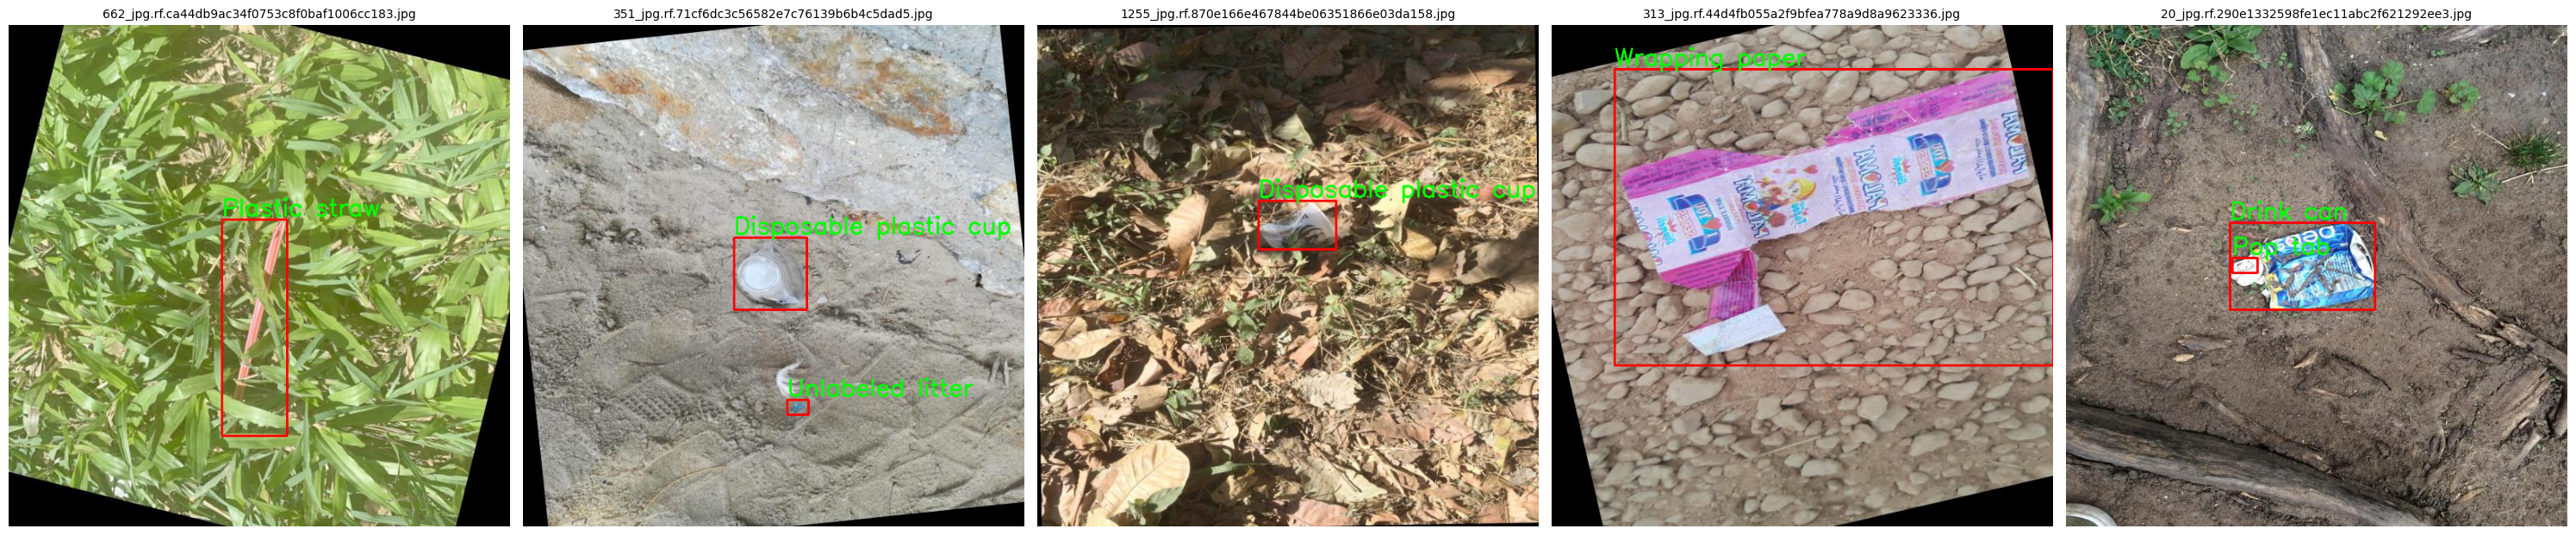

In [3]:
import os
import random
import cv2
from matplotlib import pyplot as plt

# Path to training images and labels
images_path = os.path.join(dataset_path, "train/images")
labels_path = os.path.join(dataset_path, "train/labels")

# Class names from your data.yaml
class_names = [
    "Aerosol","Aluminium blister pack","Battery","Broken glass","Carded blister pack",
    "Cigarette","Clear plastic bottle","Corrugated carton","Crisp packet","Disposable food container",
    "Disposable plastic cup","Drink can","Drink carton","Egg carton","Foam cup","Foam food container",
    "Food Can","Food waste","Garbage bag","Glass bottle","Glass cup","Glass jar","Magazine paper",
    "Meal carton","Metal bottle cap","Metal lid","Normal paper","Other carton","Other plastic",
    "Other plastic bottle","Other plastic container","Other plastic cup","Other plastic wrapper",
    "Paper bag","Paper cup","Paper straw","Pizza box","Plastic bottle cap","Plastic film",
    "Plastic glooves","Plastic lid","Plastic straw","Plastic utensils","Polypropylene bag","Pop tab",
    "Rope - strings","Scrap metal","Shoe","Single-use carrier bag","Six pack rings","Spread tub",
    "Squeezable tube","Styrofoam piece","Tissues","Toilet tube","Tupperware","Unlabeled litter",
    "Wrapping paper","json"
]

# Get list of images
image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png'))]

# Pick 5 random images
sample_files = random.sample(image_files, 5)

# Create subplots: 1 row, 5 columns
fig, axes = plt.subplots(1, len(sample_files), figsize=(30, 10))

for ax, image_file in zip(axes, sample_files):
    img = cv2.imread(os.path.join(images_path, image_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    label_file = os.path.join(labels_path, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                h, w, _ = img.shape
                x1 = int((x_center - width/2) * w)
                y1 = int((y_center - height/2) * h)
                x2 = int((x_center + width/2) * w)
                y2 = int((y_center + height/2) * h)

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # Draw class name instead of class ID
                class_name = class_names[int(class_id)]
                cv2.putText(img, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    ax.imshow(img)
    ax.axis('off')
    ax.set_title(image_file, fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
import os


labels_dirs = [os.path.join(dataset_path, "train/labels"),
               os.path.join(dataset_path, "valid/labels")]

# Mapping: old TACO class_id -> new class_id
old_to_new = {
    # Plastic
    0:0, 3:0, 6:0, 8:0, 9:0, 10:0, 12:0, 13:0, 14:0, 15:0, 28:0, 29:0, 30:0, 31:0, 32:0, 37:0, 38:0, 39:0, 40:0, 41:0, 42:0, 50:0, 51:0,
    # Metal
    2:1, 11:1, 24:1, 25:1, 44:1, 46:1, 49:1,
    # Paper
    22:2, 26:2, 33:2, 34:2, 35:2, 36:2, 7:2, 23:2, 27:2, 4:2,
    # Organic/Food
    16:3, 17:3,
    # Glass
    3:4, 19:4, 20:4, 21:4,
    # Other/Misc
    1:5, 5:5, 18:5, 43:5, 45:5, 47:5, 48:5, 52:5, 53:5, 54:5, 55:5, 56:5, 57:5, 58:5
}
# Create new label folders and remap labels
for dir in labels_dirs:
    new_dir = dir + "_grouped"
    os.makedirs(new_dir, exist_ok=True)

    for file in os.listdir(dir):
        if file.endswith(".txt"):
            with open(os.path.join(dir, file), 'r') as f:
                lines = f.readlines()
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                old_id = int(parts[0])
                if old_id in old_to_new:
                    new_id = old_to_new[old_id]
                    new_lines.append(f"{new_id} {' '.join(parts[1:])}\n")
            # Save new label
            with open(os.path.join(new_dir, file), 'w') as f:
                f.writelines(new_lines)


In [5]:
import os


for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:2]:
        print(f"{subindent}{f}")


TACO-1/
    README.roboflow.txt
    data.yaml
    train/
        labels_grouped/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        labels/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        images/
            936_jpg.rf.878510c3705e0a9eb23d82dcd26902e7.jpg
            343_jpg.rf.83047afc3f554de1ac82e39c4854f076.jpg
    valid/
        labels_grouped/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        labels/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        images/
            1154_jpg.rf.6ff9673b0d3ad6699c0ea792dbd7bbba.jpg
            846_jpg.rf.c799671f6e6709cf36056cf3a184e92c.jpg
    test/
        labels/
            1000_jpg.rf.f29d4ef9486dbf7a73cd51e9b8205dc2.txt
        

In [6]:
import os
import shutil
from tqdm import tqdm

def copy_with_progress_bar(src_folder, dst_folder):
    files = [f for f in os.listdir(src_folder) if f.endswith(".txt")]
    os.makedirs(dst_folder, exist_ok=True)
    
    for file in tqdm(files, desc=f"Copying to {dst_folder}"):
        shutil.copy(os.path.join(src_folder, file), os.path.join(dst_folder, file))

# Paths
train_labels = "/kaggle/working/TACO-1/train/labels"
valid_labels = "/kaggle/working/TACO-1/valid/labels"

train_grouped = "/kaggle/working/TACO-1/train/labels_grouped"
valid_grouped = "/kaggle/working/TACO-1/valid/labels_grouped"

# Optional: remove original folders first
shutil.rmtree(train_labels)
shutil.rmtree(valid_labels)

# Copy with progress bar
copy_with_progress_bar(train_grouped, train_labels)
copy_with_progress_bar(valid_grouped, valid_labels)


Copying to /kaggle/working/TACO-1/valid/labels: 100%|██████████| 400/400 [00:00<00:00, 12007.57it/s]


In [7]:
import os


for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:2]:
        print(f"{subindent}{f}")


TACO-1/
    README.roboflow.txt
    data.yaml
    train/
        labels_grouped/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        labels/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        images/
            936_jpg.rf.878510c3705e0a9eb23d82dcd26902e7.jpg
            343_jpg.rf.83047afc3f554de1ac82e39c4854f076.jpg
    valid/
        labels_grouped/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        labels/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        images/
            1154_jpg.rf.6ff9673b0d3ad6699c0ea792dbd7bbba.jpg
            846_jpg.rf.c799671f6e6709cf36056cf3a184e92c.jpg
    test/
        labels/
            1000_jpg.rf.f29d4ef9486dbf7a73cd51e9b8205dc2.txt
        

In [8]:
data_yaml_content = """
train: "/kaggle/working/TACO-1/train/images"
val: "/kaggle/working/TACO-1/valid/images"
test: "/kaggle/working/TACO-1/test/images"

nc: 6

names: ['Plastic', 'Metal', 'Paper', 'Organic', 'Glass', 'Other']
"""

# Save as a new YAML file
with open("/kaggle/working/TACO-1/data_grouped.yaml", "w") as f:
    f.write(data_yaml_content)


In [9]:
import os


for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:2]:
        print(f"{subindent}{f}")


TACO-1/
    data_grouped.yaml
    README.roboflow.txt
    train/
        labels_grouped/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        labels/
            1160_jpg.rf.5128f3dd10ec1ae4db4c9786d0fe16b3.txt
            622_jpg.rf.23d62b765cdb54e65da1021f715612ed.txt
        images/
            936_jpg.rf.878510c3705e0a9eb23d82dcd26902e7.jpg
            343_jpg.rf.83047afc3f554de1ac82e39c4854f076.jpg
    valid/
        labels_grouped/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        labels/
            263_jpg.rf.9b06f7e16489726261b96ef6e885e03a.txt
            1288_jpg.rf.6d8f0c28d81dcb08a26566bc2265b4e8.txt
        images/
            1154_jpg.rf.6ff9673b0d3ad6699c0ea792dbd7bbba.jpg
            846_jpg.rf.c799671f6e6709cf36056cf3a184e92c.jpg
    test/
        labels/
            1000_jpg.rf.f29d4ef9486dbf7a73cd51e9b8205dc2.txt


In [10]:
import os

def check_labels(image_dir, label_dir):
    images = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])
    labels = sorted([f for f in os.listdir(label_dir) if f.endswith(".txt")])
    missing = [img for img in images if img.replace('.jpg', '.txt') not in labels]
    if missing:
        print(f"Missing labels for {len(missing)} images:", missing)
    else:
        print("All images have corresponding labels!")

check_labels("/kaggle/working/TACO-1/train/images", "/kaggle/working/TACO-1/train/labels")
check_labels("/kaggle/working/TACO-1/valid/images", "/kaggle/working/TACO-1/valid/labels")


All images have corresponding labels!
All images have corresponding labels!


In [14]:
from collections import Counter

label_dir = "/kaggle/working/TACO-1/train/labels"
all_classes = []

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        with open(os.path.join(label_dir, file), 'r') as f:
            all_classes += [int(line.strip().split()[0]) for line in f]

Counter(all_classes)

Counter({0: 4363, 2: 800, 5: 3028, 1: 913, 4: 398, 3: 87})

In [17]:
#!pip install ultralytics

In [19]:
import os
import shutil

train_labels = "/kaggle/working/TACO-1/train/labels"
train_images = "/kaggle/working/TACO-1/train/images"

minority_class = 3
minority_images = []

for label_file in os.listdir(train_labels):
    if label_file.endswith(".txt"):
        with open(os.path.join(train_labels, label_file), 'r') as f:
            for line in f:
                cls = int(line.strip().split()[0])
                if cls == minority_class:
                    minority_images.append(label_file.replace(".txt", ".jpg"))
                    break

print(f"Found {len(minority_images)} images with minority class")


Found 54 images with minority class


In [20]:
oversample_factor = 10  # create 10 copies of each minority image

for img_file in minority_images:
    img_src = os.path.join(train_images, img_file)
    lbl_src = os.path.join(train_labels, img_file.replace(".jpg", ".txt"))

    for i in range(oversample_factor):
        img_dst = os.path.join(train_images, f"dup{i}_{img_file}")
        lbl_dst = os.path.join(train_labels, f"dup{i}_{img_file.replace('.jpg','.txt')}")
        shutil.copy(img_src, img_dst)
        shutil.copy(lbl_src, lbl_dst)


In [21]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data="/kaggle/working/TACO-1/data_grouped.yaml",
    epochs=20,
    imgsz=480,
    batch=16,
    name="taco6grouped_minority_aug",
    project="/kaggle/working/TACO-1/runs",
    augment=True,   # now augmentations mostly hit minority images too
)


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/TACO-1/data_grouped.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=taco6grouped_minority_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

invalid value encountered in less
invalid value encountered in less


                   all        400       1280      0.157      0.243       0.14      0.093
               Plastic        288        515      0.293      0.548      0.357       0.24
                 Metal         58        104      0.263      0.202       0.16      0.105
                 Paper         61         81       0.14      0.506       0.19      0.134
               Organic          8         13     0.0366     0.0197     0.0573     0.0361
                 Glass         25        113      0.046     0.0265     0.0136    0.00826
                 Other        181        454      0.165      0.156     0.0605     0.0348
Speed: 0.1ms preprocess, 5.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/TACO-1/runs/taco6grouped_minority_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac6446a8dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [22]:
import shutil

src = "/kaggle/working/TACO-1/runs/taco6grouped_minority_aug/weights/best.pt"
dst = "/kaggle/working/TACO-1/yolo6classes_best.pt"

shutil.copy(src, dst)
print(f"Model saved to {dst}")


Model saved to /kaggle/working/TACO-1/yolo6classes_best.pt
